# TFIDF and APRIORI


https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/#apriori-frequent-itemsets-via-the-apriori-algorithm

https://rasbt.github.io/mlxtend/

Week 6 exercises

In [2]:
# Imports

import pandas as pd
import os
import hdf5_getters as hdf5_getters
import numpy as np
from tqdm import tqdm

In [3]:
path = 'MillionSongSubset'
songs_list = []

for (root, dirs, file) in os.walk(path):
    for f in file:
        songs_list.append(os.path.dirname(f))

            
print(len(songs_list))

10000


In [4]:
## READ DATA PATH FROM FILE
songs_file_paths = []

for root, dirs, files in os.walk(os.path.abspath(path)):
    for file in files:        
        strs = os.path.join(root, file)
        new_strs = strs.replace('\\','/')
        songs_file_paths.append(new_strs)

In [5]:
print(songs_file_paths[0])

C:/Users/msipek3/Documents/GitHub/comp_tools/MillionSongSubset/A/A/A/TRAAAAW128F429D538.h5


In [6]:
len(songs_file_paths)

10000

In [7]:
### CREATE PANDAS TABLE

N = len(songs_file_paths)
data = []

for i in range(N):
    record = []
    
    # Open specific song path
    h5 = hdf5_getters.open_h5_file_read(songs_file_paths[i])
    
    #getters
    artist_id = hdf5_getters.get_artist_id(h5)
    artist_id = artist_id.decode("utf-8")     
    
    #artist_name  = hdf5_getters.get_artist_name(h5)
    #artist_name = artist_name.decode("utf-8") 
    
    #artist_location  = hdf5_getters.get_artist_location(h5)
    #artist_location = artist_location.decode("utf-8") 
    
    song_id = hdf5_getters.get_song_id(h5)
    song_id = song_id.decode("utf-8")
    
    song_name = hdf5_getters.get_title(h5)
    song_name = song_name.decode("utf-8")
    
    #song_hottness = hdf5_getters.get_song_hotttnesss(h5)
    
    #time_signature = hdf5_getters.get_time_signature(h5)
    
    artist_terms_ = hdf5_getters.get_artist_terms(h5)
    artist_terms = []
    for j in range(len(artist_terms_)):
        artist_terms.append(artist_terms_[j].decode("utf-8"))
    
    #artist_mbtags = hdf5_getters.get_artist_mbtags(h5)
    
    #mode = hdf5_getters.get_mode(h5)
    
    #year = hdf5_getters.get_year(h5)
    
    #latitude = hdf5_getters.get_artist_latitude(h5)
    #longitude = hdf5_getters.get_artist_longitude(h5)
    
    # Close file
    h5.close()
    
    record.append(artist_id)
    #record.append(artist_name)
    #record.append(artist_location)
    record.append(song_id)
    record.append(song_name)
    #record.append(song_hottness)
    #record.append(time_signature)
    record.append(artist_terms)
    #record.append(artist_mbtags)
    #record.append(mode)
    #record.append(year)
    #record.append(latitude)
    #record.append(longitude)
    
    # Add
    data.append(record)

In [12]:
#df = pd.DataFrame(data, columns=['artist_id', 'artist_name', 'artist_location', 'song_id', 'song_name', 'song_hottness','time_signature','artist_terms','artist_mbtags','mode','year','latitude','longitude'])
df = pd.DataFrame(data, columns=['artist_id','song_id','song_name','artist_terms'])
df

,artist_id,song_id,song_name,artist_terms
0,ARD7TVE1187B99BFB1,SOMZWCG12A8C13C480,I Didn't Mean To,"[hip hop, underground rap, g funk, alternative..."
1,ARMJAGH1187FB546F3,SOCIWDW12A8C13D406,Soul Deep,"[blue-eyed soul, pop rock, blues-rock, beach m..."
2,ARKRRTF1187B9984DA,SOXVLOJ12AB0189215,Amor De Cabaret,"[salsa, cumbia, tejano, ranchera, latin pop, l..."
3,AR7G5I41187FB4CE6C,SONHOTT12A8C13493C,Something Girls,"[pop rock, new wave, dance rock, rock, new rom..."
4,ARXR32B1187FB57099,SOFSOCN12A8C143F5D,Face the Ashes,"[pop punk, ska punk, breakcore, alternative me..."
...,...,...,...,...
9995,AR4C6V01187FB3BAF4,SOLXXPY12A67ADABA0,The Hanged Man,"[sympho black metal, black metal, heavy metal,..."
9996,AR9JLBU1187B9AAEC4,SOAYONI12A6D4F85C8,The Wonderful World Of The Young,"[ballad, disco, northern soul, chanson, smooth..."
9997,ARS1DCR1187B9A4A56,SOJZLAJ12AB017E8A2,Sentimental Man,"[lovers rock, reggae, roots reggae, dub, orche..."
9998,ARAGMIV11F4C843F78,SORZSCJ12A8C132446,Zydeco In D-Minor,"[zydeco, cajun]"


In [23]:
df1

,artist_id,song_id,artist_terms
1,ARMJAGH1187FB546F3,SOCIWDW12A8C13D406,"[blue-eyed soul, pop rock, blues-rock, beach m..."
4,ARXR32B1187FB57099,SOFSOCN12A8C143F5D,"[pop punk, ska punk, breakcore, alternative me..."
7,AR10USD1187B99F3F1,SOHKNRJ12A6701D1F8,"[post-hardcore, screamo, emo, hardcore, punk r..."
11,ARC43071187B990240,SOKEJEJ12A8C13E0D0,"[ccm, religious music, los angeles, christian ..."
12,ARL7K851187B99ACD2,SOMUYGI12AB0188633,"[bachata, merengue, reggaeton, latin pop, span..."
...,...,...,...
9990,ARUUP4L1187B9B72EB,SOILDRV12A8C13EB77,"[no wave, experimental rock, instrumental rock..."
9991,ARI4S0E1187B9B06C0,SOBUUYV12A58A7DA27,"[celtic, future jazz, downtempo, easy listenin..."
9993,ARQ91R31187FB38A88,SOUWMIW12AB0184748,"[bluegrass, classic country, country gospel, c..."
9995,AR4C6V01187FB3BAF4,SOLXXPY12A67ADABA0,"[sympho black metal, black metal, heavy metal,..."


In [9]:
### GET USERS TASTE
#triples

user_plays = pd.read_csv('train_triplets.txt', sep='\t', names = ['userID','songID', 'play_count'])
user_plays

,userID,songID,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
...,...,...,...
48373581,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUHHHH12AF729E4AF,2
48373582,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUJVIT12A8C1451C1,1
48373583,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUSMXX12AB0185C24,1
48373584,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOWYSKH12AF72A303A,3


In [10]:
all_user_songs = user_plays['songID']
myset_user = set(all_user_songs)
print(len(myset_user))

384546


In [14]:
df1 = df[df.duplicated(['artist_id'], keep=False)]


In [15]:
songs_set = set(df['song_id'])

In [16]:
z = myset_user.intersection(songs_set)
print(len(z))

3675


In [17]:
songs_cleaned = df.loc[df['song_id'].isin(z)]

In [18]:
users_cleaned = user_plays.loc[user_plays['songID'].isin(z)]

In [19]:
df1 = songs_cleaned

In [21]:
baskets = df1['artist_terms'].tolist()

## MARKET BASKET
[1] Comp Tools for Data Science/ Autumn 2022 : Week06_Solution_Notebook7
[2] Machine learning library https://rasbt.github.io/mlxtend/

In [22]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(baskets).transform(baskets)
df2 = pd.DataFrame(te_ary, columns=te.columns_)
df2

,00s,00s country,00s pop,1960s soul,1970s soul,2 meter sessies,2 step,2 tone,2008 bonnaroo,20th century,...,yodel,yoga,youth crew,yugoslavia,zaire,zairean,zouk,zxzw,zxzw 2008,zydeco
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3671,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3672,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3673,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
from mlxtend.frequent_patterns import apriori

apr = apriori(df2, min_support=0.05, use_colnames=True)

In [24]:
apr['length'] = apr['itemsets'].apply(lambda x: len(x))
apr

,support,itemsets,length
0,0.105034,(00s),1
1,0.059592,(60s),1
2,0.095510,(70s),1
3,0.195102,(80s),1
4,0.170612,(90s),1
...,...,...,...
7247,0.050068,"(rock, pop rock, indie rock, indie, alternativ...",7
7248,0.063129,"(rock, indie rock, indie, alternative rock, po...",7
7249,0.051973,"(rock, metal, indie, alternative rock, pop, al...",7
7250,0.052789,"(rock, indie rock, electronic, indie, pop, alt...",7


In [25]:
ml_freq_pairs = []
for i in apr[apr['length']==5].itemsets.values:
    ml_freq_pairs.append(list(i))

print(len(ml_freq_pairs))

1133


In [26]:
ml_freq_pairs

[['rock', 'electronic', '80s', 'pop', '90s'],
 ['80s', 'alternative rock', 'pop', 'alternative', 'classic rock'],
 ['rock', '80s', 'alternative rock', 'alternative', 'classic rock'],
 ['electronic', '80s', 'alternative rock', 'pop', 'alternative'],
 ['rock', 'electronic', '80s', 'alternative rock', 'alternative'],
 ['rock', 'hard rock', '80s', 'alternative rock', 'alternative'],
 ['80s', 'indie', 'alternative rock', 'pop', 'alternative'],
 ['rock', '80s', 'indie', 'alternative rock', 'alternative'],
 ['rock', '80s', 'alternative rock', 'pop', 'alternative'],
 ['rock', '80s', 'alternative rock', 'alternative', 'punk'],
 ['rock', 'electronic', '80s', 'alternative', 'classic rock'],
 ['rock', '80s', 'pop', 'alternative', 'classic rock'],
 ['rock', 'electronic', '80s', 'indie', 'alternative'],
 ['rock', 'electronic', '80s', 'pop', 'alternative'],
 ['rock', 'hard rock', '80s', 'pop', 'alternative'],
 ['rock', '80s', 'indie', 'pop', 'alternative'],
 ['rock', '80s', 'indie', 'alternative', 'p

In [27]:
artist_terms_df = df['artist_terms']
artist_terms_df

0       [hip hop, underground rap, g funk, alternative...
1       [blue-eyed soul, pop rock, blues-rock, beach m...
2       [salsa, cumbia, tejano, ranchera, latin pop, l...
3       [pop rock, new wave, dance rock, rock, new rom...
4       [pop punk, ska punk, breakcore, alternative me...
                              ...                        
9995    [sympho black metal, black metal, heavy metal,...
9996    [ballad, disco, northern soul, chanson, smooth...
9997    [lovers rock, reggae, roots reggae, dub, orche...
9998                                      [zydeco, cajun]
9999    [christian rock, christian alternative rock, c...
Name: artist_terms, Length: 10000, dtype: object

In [51]:
compression_opts = dict(method='zip', archive_name='out.csv')  
users_cleaned.to_csv('users_cleaned.zip', index=False, compression=compression_opts)  
songs_cleaned.to_csv('songs_cleaned.zip', index=False, compression=compression_opts)  

In [39]:
def getUserSongTags(userID):
    one_user_data = users_cleaned.loc[users_cleaned['userID'] == userID]
    songs = one_user_data['songID']
    tag_list = []
    print(one_user_data)
    
    for song in songs:
        song_data = songs_cleaned.loc[songs_cleaned['song_id'] == song]
        tags = song_data['artist_terms']
        tag_list.append(list(tags))
    
    return tag_list
    

In [40]:
def getUserSongTagsMULTIPLIED(userID):
    one_user_data = users_cleaned.loc[users_cleaned['userID'] == userID]
    songs = one_user_data['songID']
    tag_list = []
    
    
    for song in songs:
        song_data = songs_cleaned.loc[songs_cleaned['song_id'] == song]
        a = one_user_data.loc[one_user_data['songID'] == song]
        song_play_count = a['play_count']
        tags = song_data['artist_terms']
        #print(song_play_count)
        ints = int(song_play_count)
        #print('AFTER : ', ints)
        for i in range(0, (ints+1)):
            tag_list.append(list(tags))
            #print(i)
        
        #print(tags)
        #print(song_play_count)
    
    return tag_list
    

In [41]:
def listToString(s):
   
    # initialize an empty string
    str1 = " "
   
    # return string 
    sj = (str1.join(s))
    return sj

In [42]:
user_tags = getUserSongTagsMULTIPLIED('8305c896f42308824da7d4386f4b9ee584281412')

#print(user_tags)

In [43]:
import nltk, re, pprint
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
import math
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


def getTFIDFuser(userID):
    user_tags = getUserSongTagsMULTIPLIED(userID)
    #print(user_tags)
    
    tf_dc = {}
    other_documents = []
    porter = nltk.PorterStemmer()
    tokenizer = RegexpTokenizer(r'\w+')
    doc = []
    
    for i in range(len(user_tags)):
        var = user_tags[i][0]
        #print(var)
        doc.append(listToString(var))
        #print(doc)

    doc = listToString(doc)
    other_documents.append(doc)
    tokens = tokenizer.tokenize(doc)
    tokens = [w.lower() for w in tokens]
    # tokens = [porter.stem(w) for w in tokens]

    for token in tokens:
        if token in tf_dc:
            tf_dc[token] += 1
        else:
            tf_dc[token] = 1
            
    tf_dc = dict(sorted(tf_dc.items(), key=lambda item: item[1], reverse=True))
    # We have only two documents
    N = (len(user_tags)) 
    idf_dc = {}

    for word in tf_dc.keys():
        n = 0
        for doc in other_documents:
            if word in doc:
                n += 1

        idf_dc[word] = math.log(N / (n + 1)) + 1
        
    tf_idf_dc = {}
    for word in tf_dc.keys():
        tf_idf_dc[word] = tf_dc[word] * idf_dc[word]
    
    return tf_idf_dc

In [44]:
user_tfidf = getTFIDFuser('8305c896f42308824da7d4386f4b9ee584281412')


first2pairs = {k: user_tfidf[k] for k in list(user_tfidf)[:7]}
user_favourite_tags = []


for genre, weight in first2pairs.items():
    print(genre, ' : ',weight)
    user_favourite_tags.append(genre)

print(user_favourite_tags)

rock  :  227.1949043343675
pop  :  130.80918734402977
alternative  :  117.03979920255294
rap  :  86.05867588423011
metal  :  68.84694070738408
indie  :  61.96224663664567
guitar  :  55.07755256590727
['rock', 'pop', 'alternative', 'rap', 'metal', 'indie', 'guitar']


In [45]:
item_tags_for_finding_songs = []

for items in ml_freq_pairs:
    res = len(set(user_favourite_tags) & set(items))
    uncommon_elements = set(user_favourite_tags) ^ set(items)
    if(res >= 5 ):
        #print(items)
        print(uncommon_elements)
        item_tags_for_finding_songs.append(uncommon_elements)
        print()
    

{'rap', 'metal'}

{'guitar', 'rap'}



In [46]:
songs_cleaned

,artist_id,song_id,song_name,artist_terms
1,ARMJAGH1187FB546F3,SOCIWDW12A8C13D406,Soul Deep,"[blue-eyed soul, pop rock, blues-rock, beach m..."
4,ARXR32B1187FB57099,SOFSOCN12A8C143F5D,Face the Ashes,"[pop punk, ska punk, breakcore, alternative me..."
7,AR10USD1187B99F3F1,SOHKNRJ12A6701D1F8,Drop of Rain,"[post-hardcore, screamo, emo, hardcore, punk r..."
11,ARC43071187B990240,SOKEJEJ12A8C13E0D0,The Urgency (LP Version),"[ccm, religious music, los angeles, christian ..."
12,ARL7K851187B99ACD2,SOMUYGI12AB0188633,La Culpa,"[bachata, merengue, reggaeton, latin pop, span..."
...,...,...,...,...
9990,ARUUP4L1187B9B72EB,SOILDRV12A8C13EB77,Dark End Of The Street,"[no wave, experimental rock, instrumental rock..."
9991,ARI4S0E1187B9B06C0,SOBUUYV12A58A7DA27,The Forgotten Lands,"[celtic, future jazz, downtempo, easy listenin..."
9993,ARQ91R31187FB38A88,SOUWMIW12AB0184748,Down In Dixie,"[bluegrass, classic country, country gospel, c..."
9995,AR4C6V01187FB3BAF4,SOLXXPY12A67ADABA0,The Hanged Man,"[sympho black metal, black metal, heavy metal,..."


In [47]:
songid_matches = {}

for index, row in songs_cleaned.iterrows():
    
    res = len(set(user_favourite_tags) & set(row['artist_terms']))
    if(res >= 6 ):
        songid_matches[row['song_id']] = res
        #print(res)
    
    #uncommon_elements = set(user_favourite_tags) ^ set(items)
    #print(row)

In [48]:

a = dict(sorted(songid_matches.items(), key=lambda x: x[1],  reverse=True) )
top10recommended = {k: a[k] for k in list(a)[:10]}

top10recommended

{'SOBQBWP12AB018611B': 7,
 'SOAESJW12A8C137CC2': 7,
 'SORERTC12A8AE454B3': 7,
 'SOOJFKG12A8C1334E6': 7,
 'SOCRNKC12A6D4FAE9D': 7,
 'SOGVJTG12A6701E991': 7,
 'SOCWHIU12AB01872DA': 7,
 'SOKEBYL12A6D4F6FBF': 7,
 'SOYRCTM12AB01860FA': 7,
 'SOIWOPZ12A8C135EBA': 7}

In [54]:
for i in top10recommended:
    print((i))

SOBQBWP12AB018611B
SOAESJW12A8C137CC2
SORERTC12A8AE454B3
SOOJFKG12A8C1334E6
SOCRNKC12A6D4FAE9D
SOGVJTG12A6701E991
SOCWHIU12AB01872DA
SOKEBYL12A6D4F6FBF
SOYRCTM12AB01860FA
SOIWOPZ12A8C135EBA


In [50]:
song_name = df.loc[df['song_id'] == 'SOJXVAH12A8C139700']

song_name['song_name']
song_name['artist_terms']

def getSongName(songID):
    song_name = df.loc[df['song_id'] == songID]
    return song_name['song_name']
    

In [51]:
print(getSongName('SOJXVAH12A8C139700'))

36    Barking Dogs (From "Piouhgd")
Name: song_name, dtype: object


<BarContainer object of 92 artists>

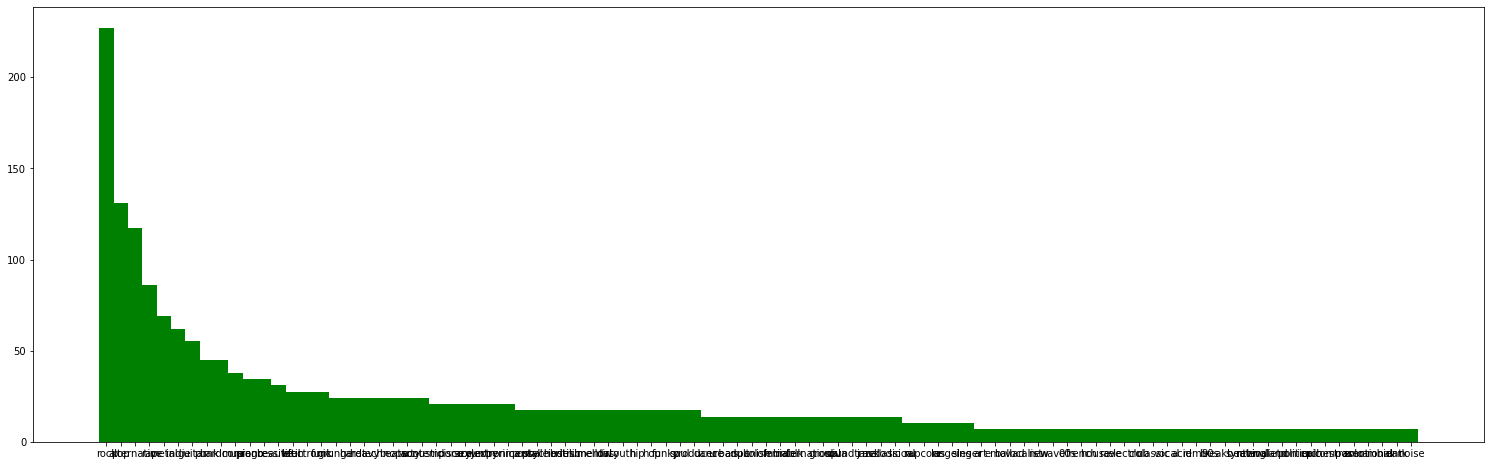

In [57]:
plt.figure(figsize = (26, 8), facecolor = None)
plt.bar(user_tfidf.keys(), user_tfidf.values(), 1, color='g')
